# hello!
this is the text and multi media mining project i am working on! I look at reddit, and see whether the openness of people is in any form an indication of the change in positivity over time

In [38]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define file path to folder with .wav files
folder_path = '../data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# get the data
path = folder_path + '/preprocessed_data3.csv'
df = pd.read_csv(path)
print(df.shape)
df.head()

(252617, 9)


,subreddit,author,date,post,word_count,neg,neu,pos,compound
0,anxiety,ljf3030,2019-07-06,"I can always feel my heartbeat 18M, physically...",118,0.106,0.803,0.091,0.3136
1,anxiety,1millionkarmagoal,2019-07-06,My dad is hospitalized and had to be put in a ...,212,0.055,0.827,0.117,0.9325
2,anxiety,ItsIncremento,2019-07-06,Feels like anxiety is turning my brain to stew...,276,0.265,0.625,0.110,-0.9953
3,anxiety,Emet_Throwaway,2019-07-06,What do you do when anxiety kicks in around ot...,64,0.245,0.717,0.038,-0.9146
4,anxiety,throwaway239423489,2019-07-06,Finding a job is a nightmare I want to rant ab...,217,0.143,0.816,0.041,-0.9398


In [41]:
# openness metric is defined as min(word_count/400, 1)
df['openness'] = [min(count/400,1) for count in df['word_count']]
df.head()

,subreddit,author,date,post,word_count,neg,neu,pos,compound,openness
0,anxiety,ljf3030,2019-07-06,"I can always feel my heartbeat 18M, physically...",118,0.106,0.803,0.091,0.3136,0.2950
1,anxiety,1millionkarmagoal,2019-07-06,My dad is hospitalized and had to be put in a ...,212,0.055,0.827,0.117,0.9325,0.5300
2,anxiety,ItsIncremento,2019-07-06,Feels like anxiety is turning my brain to stew...,276,0.265,0.625,0.110,-0.9953,0.6900
3,anxiety,Emet_Throwaway,2019-07-06,What do you do when anxiety kicks in around ot...,64,0.245,0.717,0.038,-0.9146,0.1600
4,anxiety,throwaway239423489,2019-07-06,Finding a job is a nightmare I want to rant ab...,217,0.143,0.816,0.041,-0.9398,0.5425


((57671, 10), (45332, 10), (117331, 10), (23635, 10), (8648, 10))

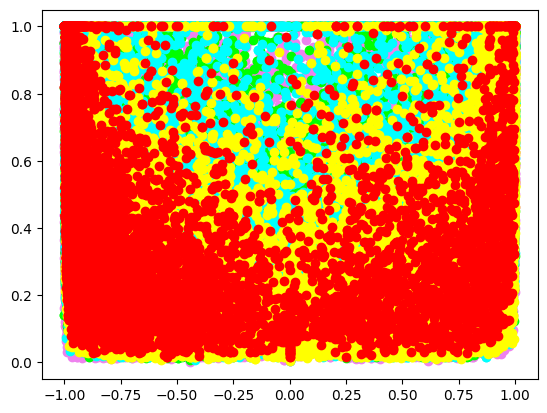

In [42]:
anxiety = df[df["subreddit"] == "anxiety"]
mentalhealth = df[df["subreddit"] == "mentalhealth"]
depression = df[df["subreddit"] == "depression"]
lonely = df[df["subreddit"] == "lonely"]
hanxiety = df[df["subreddit"] == "healthanxiety"]

plt.scatter(depression['compound'], depression['openness'], color = 'violet', label = 'depression')
plt.scatter(anxiety['compound'], anxiety['openness'], color = 'lime', label = 'anxiety')
plt.scatter(mentalhealth['compound'], mentalhealth['openness'], color = 'cyan', label = 'mental health')
plt.scatter(lonely['compound'], lonely['openness'], color = 'yellow', label = 'mental health')
plt.scatter(hanxiety['compound'], hanxiety['openness'], color = 'red', label = 'mental health')

anxiety.shape, mentalhealth.shape, depression.shape, lonely.shape, hanxiety.shape

In [43]:
from collections import Counter

minimum_post_amount = 7

# Use Counter to count elements
author_cnt = Counter(df['author'].values)

# Sort elements based on frequency
sorted_authors = sorted(author_cnt.items(), key=lambda x: x[1], reverse=True)

# save all authors with more posts than the minimum_post_amount in author_set
author_set = []
s = ''
counts = []
for auth, cnt in sorted_authors:
  counts.append(cnt)
  if cnt < minimum_post_amount:
    s = s
  else:
    author_set.append(auth)
len(author_set), len(sorted_authors)

(131, 201089)

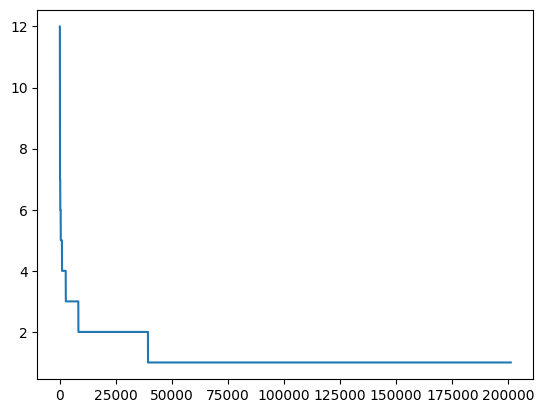

In [44]:
plt.plot(counts)

In [45]:
# store all multi-posting authors into a new dataframe
common = pd.DataFrame(df[df['author']==author_set[0]])
for author in author_set[1:]:
  common = pd.concat([common, df[df['author']==author]])
print(common.shape)
common.head()

(994, 10)


,subreddit,author,date,post,word_count,neg,neu,pos,compound,openness
843,anxiety,vitalogy95,2019-08-06,Came to the conclusion that I’m just not a goo...,162,0.211,0.634,0.155,-0.8314,0.4050
30303,anxiety,vitalogy95,2019-01-12,Does anyone ever feel like sounds or your thou...,127,0.203,0.784,0.013,-0.9749,0.3175
46075,anxiety,vitalogy95,2020-01-27,Do therapists care about you or are you just a...,99,0.119,0.779,0.102,-0.6908,0.2475
81106,mentalhealth,vitalogy95,2019-01-13,"Inner voice sometimes feels distorted/strange,...",269,0.128,0.822,0.051,-0.9521,0.6725
91645,mentalhealth,vitalogy95,2020-01-16,Is there anywhere I can go to get immediate he...,79,0.179,0.691,0.130,-0.7311,0.1975


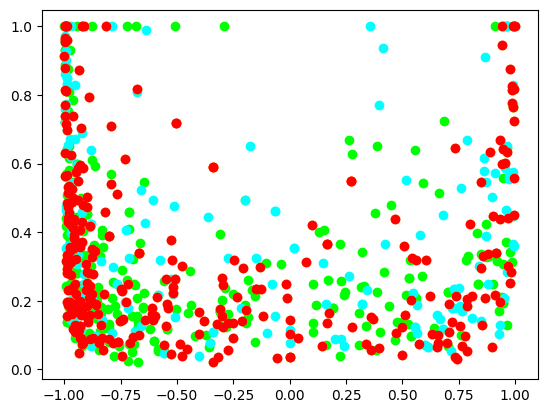

In [46]:
anxiety = common[common["subreddit"] == "anxiety"]
mentalhealth = common[common["subreddit"] == "mentalhealth"]
depression = common[common["subreddit"] == "depression"]
lonely = common[common["subreddit"] == "depression"]
hanxiety = common[common["subreddit"] == "depression"]
anxiety.shape, mentalhealth.shape, depression.shape, lonely.shape, hanxiety.shape

plt.scatter(depression['compound'], depression['openness'], color = 'violet', label = 'depression')
plt.scatter(anxiety['compound'], anxiety['openness'], color = 'lime', label = 'anxiety')
plt.scatter(mentalhealth['compound'], mentalhealth['openness'], color = 'cyan', label = 'mental health')
plt.scatter(lonely['compound'], lonely['openness'], color = 'yellow', label = 'mental health')
plt.scatter(hanxiety['compound'], hanxiety['openness'], color = 'red', label = 'mental health')

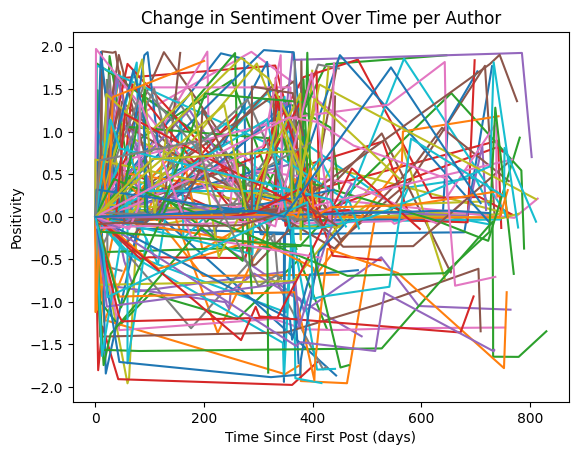

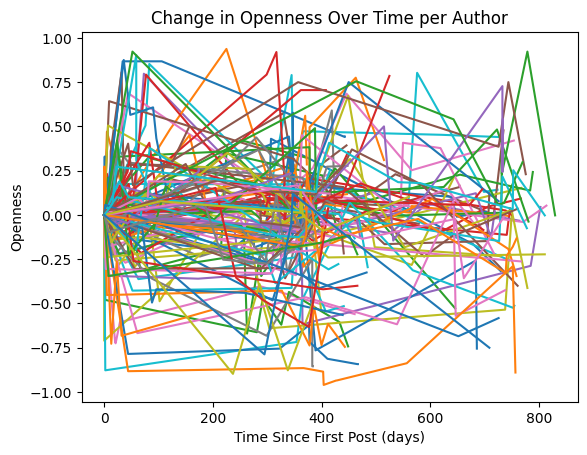

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# extract baseline and relative values
df = common

df['date'] = pd.to_datetime(df['date'])
df.sort_values(by=['author', 'date'], inplace=True)

# create a new column representing the time since the first post for each author
df['time_since_first_post'] = df.groupby('author')['date'].transform(lambda x: (x - x.min()).dt.days)

# calculate the change in openness compared to the first post for each author
df['open_change'] = df.groupby('author')['openness'].transform(lambda x: x - x.iloc[0])

# calculate the change in sentiment compared to the first post for each author
df['pos_change'] = df.groupby('author')['compound'].transform(lambda x: x - x.iloc[0])

# plot the change in sentiment and openness
for author, group in df.groupby('author'):
    plt.plot(group['time_since_first_post'], group['pos_change'], label=author)

plt.xlabel('Time Since First Post (days)')
plt.ylabel('Positivity')
plt.title('Change in Sentiment Over Time per Author')
plt.show()

for author, group in df.groupby('author'):
    plt.plot(group['time_since_first_post'], group['open_change'], label=author)

plt.xlabel('Time Since First Post (days)')
plt.ylabel('Openness')
plt.title('Change in Openness Over Time per Author')
plt.show()


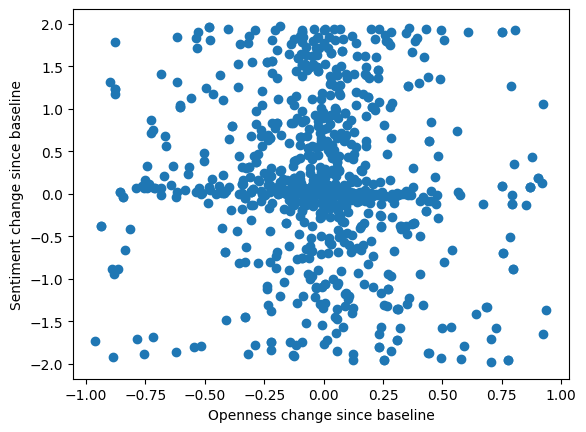

In [48]:
# plot openness and sentiment
plt.scatter(df['open_change'], df['pos_change'])
plt.xlabel('Openness change since baseline')
plt.ylabel('Sentiment change since baseline')
plt.show()


In [49]:
df.head()

,subreddit,author,date,post,word_count,neg,neu,pos,compound,openness,time_since_first_post,open_change,pos_change
26479,anxiety,0haltja16,2018-03-23,I have generalized anxiety and panic disorder ...,228,0.179,0.691,0.130,-0.7931,0.5700,0,0.0000,0.0000
28775,anxiety,0haltja16,2019-01-02,My dad has high hopes about all of us doing th...,123,0.117,0.758,0.125,-0.0378,0.3075,285,-0.2625,0.7553
172845,depression,0haltja16,2019-01-21,I really just need help I genuinely called the...,252,0.277,0.661,0.062,-0.9961,0.6300,304,0.0600,-0.2030
73087,mentalhealth,0haltja16,2019-01-24,Worried I could have Bipolar Disorder I (17f) ...,657,0.226,0.666,0.108,-0.9980,1.0000,307,0.4300,-0.2049
82107,mentalhealth,0haltja16,2019-01-24,Worried I could have Bipolar Disorder I (17f) ...,657,0.226,0.666,0.108,-0.9980,1.0000,307,0.4300,-0.2049


# Visualisation of changes in openness for the five sentiment categories

(51, 7) (20, 7) (31, 7) (5, 7) (24, 7)


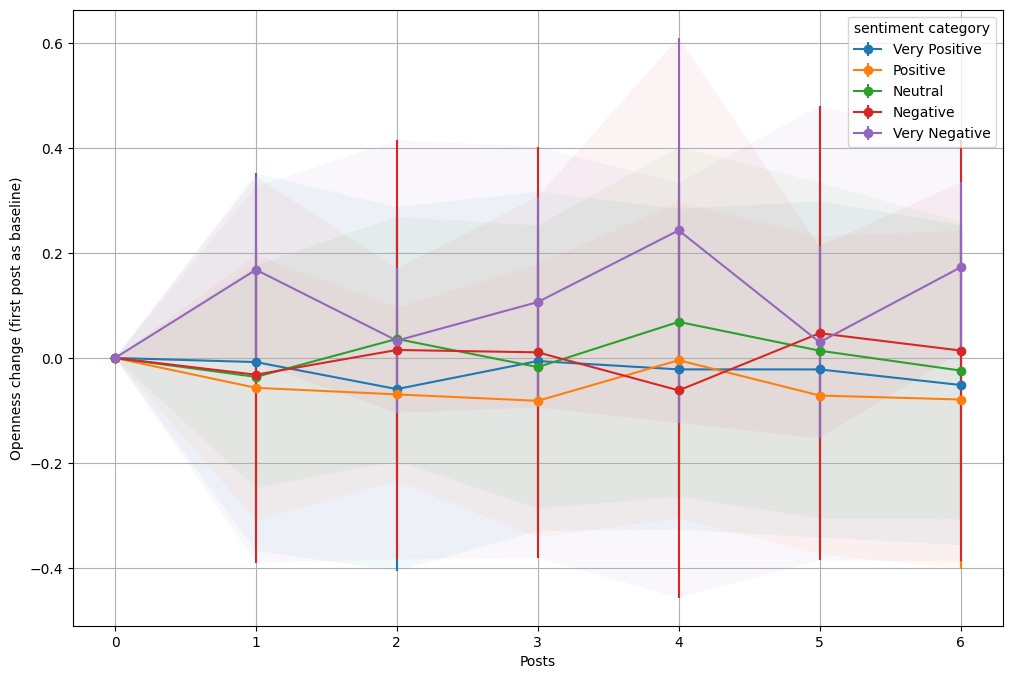

In [50]:
# baselines, changes per post and total cumulative change
pos0 = []
open0 = []
open1 = []
open2 = []
open3 = []
open4 = []
open5 = []
open6 = []
open_tot_change = []
pos_tot_change = []
open1 = []
for author in author_set:
  d = df[df['author'] == author].values
  pos0.append(d[0][8])
  open0.append(0)
  open1.append(d[1][9]- d[0][9])
  open2.append(d[2][9]- d[0][9])
  open3.append(d[3][9]- d[0][9])
  open4.append(d[4][9]- d[0][9])
  open5.append(d[5][9]- d[0][9])
  open6.append(d[6][9]- d[0][9])
  open_tot_change.append(np.sum([d for d in df[df['author']==author]['open_change']]))
  pos_tot_change.append(np.sum([d for d in df[df['author']==author]['pos_change']]))

# create a new dataframe that includes only the relevant values
mined = pd.DataFrame()
mined['pos0'] = pos0
mined['posdelta'] = pos_tot_change
mined['open0'] = open0
mined['open1'] = open1
mined['open2'] = open2
mined['open3'] = open3
mined['open4'] = open4
mined['open5'] = open5
mined['open6'] = open6
mined['opendelta'] = open_tot_change

# define the 5 way split
pluspluspos= []
pluspos = []
minpos = []
minminpos = []
samepos = []

# one-hot encoding of categories
for i in mined.values:
  if i[1] > 3:
    pluspluspos.append(1)
    pluspos.append(0)
    minpos.append(0)
    minminpos.append(0)
    samepos.append(0)
  elif i[1] > 1.5:
    pluspluspos.append(0)
    pluspos.append(1)
    minpos.append(0)
    minminpos.append(0)
    samepos.append(0)
  elif i[1] > -1.5:
    pluspluspos.append(0)
    pluspos.append(0)
    minpos.append(0)
    minminpos.append(0)
    samepos.append(1)
  elif i[1] > -3:
    pluspluspos.append(0)
    pluspos.append(0)
    minpos.append(1)
    minminpos.append(0)
    samepos.append(0)
  else:
    pluspluspos.append(0)
    pluspos.append(0)
    minpos.append(0)
    minminpos.append(1)
    samepos.append(0)

# storing the categorization
mined['minpos'] = minpos
mined['minminpos'] = minminpos
mined['pluspos'] = pluspos
mined['pluspluspos'] = pluspluspos
mined['samepos'] = samepos
mined.head()

# processing the data for each point in time
same = mined[mined['samepos'] == 1]
same = same.drop(['pos0', 'posdelta', 'opendelta', 'minpos', 'pluspos', 'samepos', 'minminpos', 'pluspluspos'], axis=1)
same_avg = [np.mean(same[i].values) for i in same]
same_std = [np.std(same[i].values) for i in same]

plus = mined[mined['pluspos'] == 1]
plus = plus.drop(['pos0', 'posdelta', 'opendelta', 'minpos', 'pluspos', 'samepos', 'minminpos', 'pluspluspos'], axis=1)
plus_avg = [np.mean(plus[i].values) for i in plus]
plus_std = [np.std(plus[i].values) for i in plus]

minus = mined[mined['minpos'] == 1]
minus = minus.drop(['pos0', 'posdelta', 'opendelta', 'minpos', 'pluspos', 'samepos', 'minminpos', 'pluspluspos'], axis=1)
min_avg = [np.mean(minus[i].values) for i in minus]
min_std = [np.std(minus[i].values) for i in minus]

minusminus = mined[mined['minminpos'] == 1]
minusminus = minusminus.drop(['pos0', 'posdelta', 'opendelta', 'minpos', 'pluspos', 'samepos', 'minminpos', 'pluspluspos'], axis=1)
minus_avg = [np.mean(minusminus[i].values) for i in minusminus]
minus_std = [np.std(minusminus[i].values) for i in minusminus]

plusplus = mined[mined['pluspluspos'] == 1]
plusplus = plusplus.drop(['pos0', 'posdelta', 'opendelta', 'minpos', 'pluspos', 'samepos', 'minminpos', 'pluspluspos'], axis=1)
plusplus_avg = [np.mean(plusplus[i].values) for i in plusplus]
plusplus_std = [np.std(plusplus[i].values) for i in plusplus]

print(plusplus.shape, plus.shape, same.shape, minus.shape, minusminus.shape)

# plot the data
time_points = [0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(12, 8))

# line plots with error bars
plt.errorbar(time_points, plusplus_avg, yerr=plusplus_std, label='Very Positive', marker='o', linestyle='-')
plt.errorbar(time_points, plus_avg, yerr=plus_std, label='Positive', marker='o', linestyle='-')
plt.errorbar(time_points, same_avg, yerr=same_std, label='Neutral', marker='o', linestyle='-')
plt.errorbar(time_points, minus_avg, yerr=minus_std, label='Negative', marker='o', linestyle='-')
plt.errorbar(time_points, min_avg, yerr=min_std, label='Very Negative', marker='o', linestyle='-')


# area charts
plt.fill_between(time_points, np.array(plusplus_avg) - np.array(plusplus_std),
                 np.array(plusplus_avg) + np.array(plusplus_std), alpha=0.05)
plt.fill_between(time_points, np.array(plus_avg) - np.array(plus_std),
                 np.array(plus_avg) + np.array(plus_std), alpha=0.05)
plt.fill_between(time_points, np.array(same_avg) - np.array(same_std),
                 np.array(same_avg) + np.array(same_std), alpha=0.05)
plt.fill_between(time_points, np.array(min_avg) - np.array(min_std),
                 np.array(min_avg) + np.array(min_std), alpha=0.05)
plt.fill_between(time_points, np.array(minus_avg) - np.array(minus_std),
                 np.array(minus_avg) + np.array(minus_std), alpha=0.05)

plt.xlabel('Posts')
plt.ylabel('Openness change (first post as baseline)')
plt.legend(title = 'sentiment category')
plt.grid(True)
plt.show()


(51, 7) (20, 7) (31, 7) (5, 7) (24, 7)


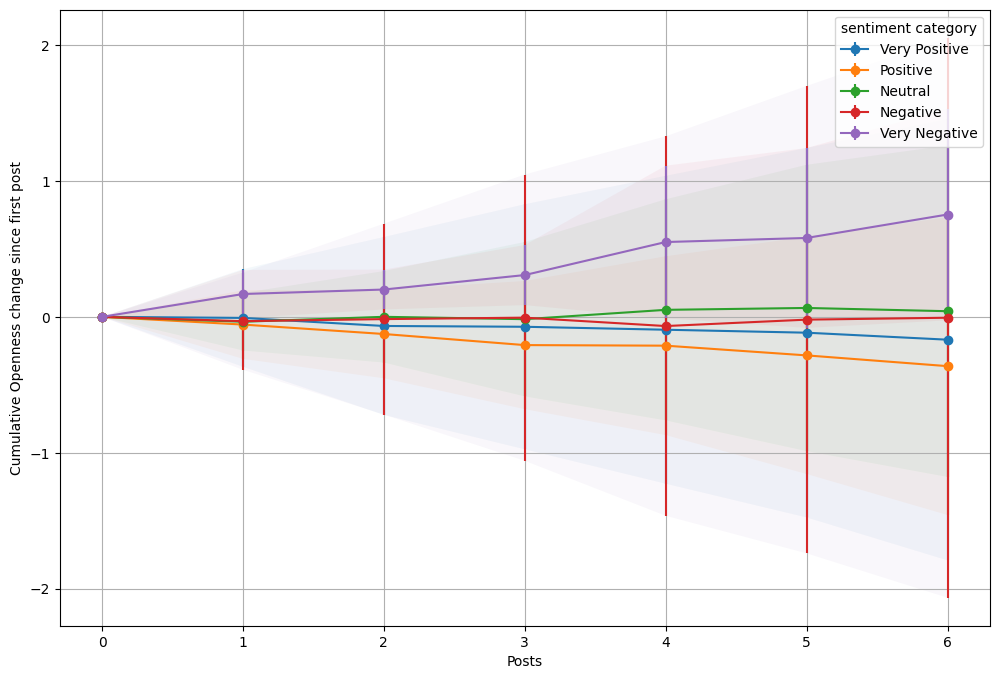

In [51]:
# the same but with cumulative changes

pos0 = []
open0 = []
open1 = []
open2 = []
open3 = []
open4 = []
open5 = []
open6 = []
open_tot_change = []
pos_tot_change = []
open1 = []
for author in author_set:
  d = df[df['author'] == author].values
  pos0.append(d[0][8])
  open0.append(0)
  open1.append(d[1][9]- d[0][9])
  open2.append(d[1][9]+d[2][9]- 2*d[0][9])
  open3.append(d[1][9]+d[2][9]+d[3][9]- 3*d[0][9])
  open4.append(d[1][9]+d[2][9]+d[3][9]+d[4][9]- 4*d[0][9])
  open5.append(d[1][9]+d[2][9]+d[3][9]+d[4][9]+d[5][9]- 5*d[0][9])
  open6.append(d[1][9]+d[2][9]+d[3][9]+d[4][9]+d[5][9]+d[6][9]- 6*d[0][9])
  open_tot_change.append(np.sum([d for d in df[df['author']==author]['open_change']]))
  pos_tot_change.append(np.sum([d for d in df[df['author']==author]['pos_change']]))
mined = pd.DataFrame()
mined['pos0'] = pos0
mined['posdelta'] = pos_tot_change
mined['open0'] = open0
mined['open1'] = open1
mined['open2'] = open2
mined['open3'] = open3
mined['open4'] = open4
mined['open5'] = open5
mined['open6'] = open6
mined['opendelta'] = open_tot_change

pluspluspos= []
pluspos = []
minpos = []
minminpos = []
samepos = []

for i in mined.values:
  if i[1] > 3:
    pluspluspos.append(1)
    pluspos.append(0)
    minpos.append(0)
    minminpos.append(0)
    samepos.append(0)
  elif i[1] > 1.5:
    pluspluspos.append(0)
    pluspos.append(1)
    minpos.append(0)
    minminpos.append(0)
    samepos.append(0)
  elif i[1] > -1.5:
    pluspluspos.append(0)
    pluspos.append(0)
    minpos.append(0)
    minminpos.append(0)
    samepos.append(1)
  elif i[1] > -3:
    pluspluspos.append(0)
    pluspos.append(0)
    minpos.append(1)
    minminpos.append(0)
    samepos.append(0)
  else:
    pluspluspos.append(0)
    pluspos.append(0)
    minpos.append(0)
    minminpos.append(1)
    samepos.append(0)
mined['minpos'] = minpos
mined['minminpos'] = minminpos
mined['pluspos'] = pluspos
mined['pluspluspos'] = pluspluspos
mined['samepos'] = samepos
mined.head()

same = mined[mined['samepos'] == 1]
same = same.drop(['pos0', 'posdelta', 'opendelta', 'minpos', 'pluspos', 'samepos', 'minminpos', 'pluspluspos'], axis=1)
same_avg = [np.mean(same[i].values) for i in same]
same_std = [np.std(same[i].values) for i in same]

plus = mined[mined['pluspos'] == 1]
plus = plus.drop(['pos0', 'posdelta', 'opendelta', 'minpos', 'pluspos', 'samepos', 'minminpos', 'pluspluspos'], axis=1)
plus_avg = [np.mean(plus[i].values) for i in plus]
plus_std = [np.std(plus[i].values) for i in plus]

minus = mined[mined['minpos'] == 1]
minus = minus.drop(['pos0', 'posdelta', 'opendelta', 'minpos', 'pluspos', 'samepos', 'minminpos', 'pluspluspos'], axis=1)
min_avg = [np.mean(minus[i].values) for i in minus]
min_std = [np.std(minus[i].values) for i in minus]

minusminus = mined[mined['minminpos'] == 1]
minusminus = minusminus.drop(['pos0', 'posdelta', 'opendelta', 'minpos', 'pluspos', 'samepos', 'minminpos', 'pluspluspos'], axis=1)
minus_avg = [np.mean(minusminus[i].values) for i in minusminus]
minus_std = [np.std(minusminus[i].values) for i in minusminus]

plusplus = mined[mined['pluspluspos'] == 1]
plusplus = plusplus.drop(['pos0', 'posdelta', 'opendelta', 'minpos', 'pluspos', 'samepos', 'minminpos', 'pluspluspos'], axis=1)
plusplus_avg = [np.mean(plusplus[i].values) for i in plusplus]
plusplus_std = [np.std(plusplus[i].values) for i in plusplus]

print(plusplus.shape, plus.shape, same.shape, minus.shape, minusminus.shape)


time_points = [0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(12, 8))

# line plots with error bars
plt.errorbar(time_points, plusplus_avg, yerr=plusplus_std, label='Very Positive', marker='o', linestyle='-')
plt.errorbar(time_points, plus_avg, yerr=plus_std, label='Positive', marker='o', linestyle='-')
plt.errorbar(time_points, same_avg, yerr=same_std, label='Neutral', marker='o', linestyle='-')
plt.errorbar(time_points, minus_avg, yerr=minus_std, label='Negative', marker='o', linestyle='-')
plt.errorbar(time_points, min_avg, yerr=min_std, label='Very Negative', marker='o', linestyle='-')


# area charts
plt.fill_between(time_points, np.array(plusplus_avg) - np.array(plusplus_std),
                 np.array(plusplus_avg) + np.array(plusplus_std), alpha=0.05)
plt.fill_between(time_points, np.array(plus_avg) - np.array(plus_std),
                 np.array(plus_avg) + np.array(plus_std), alpha=0.05)
plt.fill_between(time_points, np.array(same_avg) - np.array(same_std),
                 np.array(same_avg) + np.array(same_std), alpha=0.05)
plt.fill_between(time_points, np.array(min_avg) - np.array(min_std),
                 np.array(min_avg) + np.array(min_std), alpha=0.05)
plt.fill_between(time_points, np.array(minus_avg) - np.array(minus_std),
                 np.array(minus_avg) + np.array(minus_std), alpha=0.05)

plt.xlabel('Posts')
plt.ylabel('Cumulative Openness change since first post')
plt.legend(title = 'sentiment category')
plt.grid(True)
plt.show()


(28, 7) (17, 7) (43, 7) (16, 7) (27, 7)


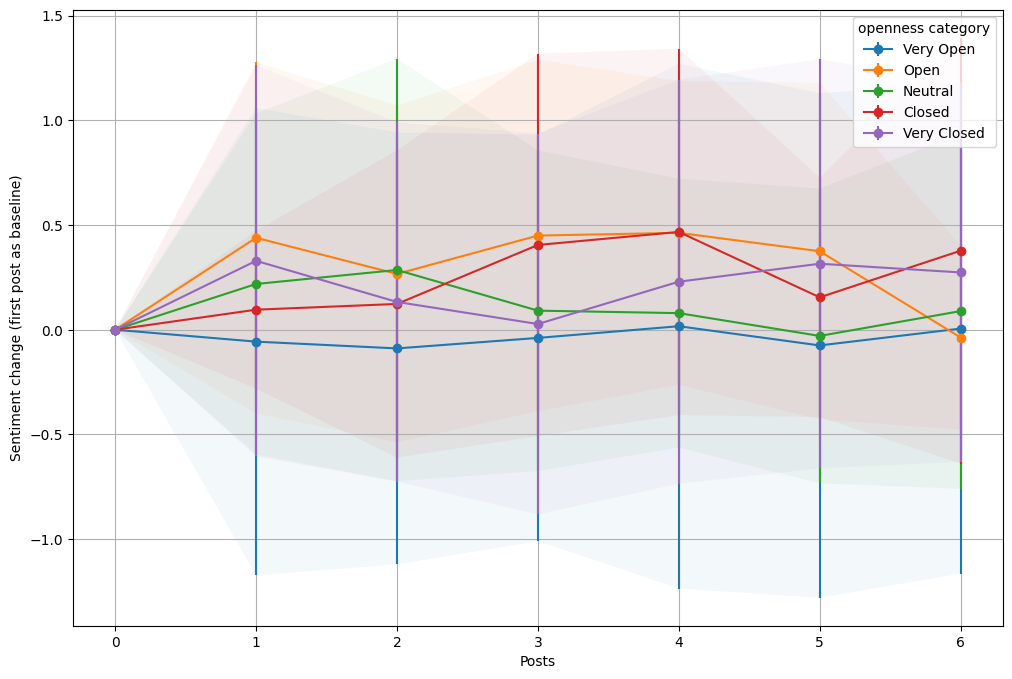

In [52]:
# now for the change in sentiment over different openness categories
open0 = []
pos0 = []
pos1 = []
pos2 = []
pos3 = []
pos4 = []
pos5 = []
pos6 = []
open_tot_change = []
pos_tot_change = []
for author in author_set:
  d = df[df['author'] == author].values
  pos0.append(0)
  open0.append(d[0][9])
  pos1.append(d[1][8] - d[0][8])
  pos2.append(d[2][8] - d[0][8])
  pos3.append(d[3][8] - d[0][8])
  pos4.append(d[4][8]- d[0][8])
  pos5.append(d[5][8] - d[0][8])
  pos6.append(d[6][8] - d[0][8])
  open_tot_change.append(np.sum([d for d in df[df['author']==author]['open_change']]))
  pos_tot_change.append(np.sum([d for d in df[df['author']==author]['pos_change']]))
mined2 = pd.DataFrame()
mined2['pos0'] = pos0
mined2['posdelta'] = pos_tot_change
mined2['open0'] = open0
mined2['pos1'] = pos1
mined2['pos2'] = pos2
mined2['pos3'] = pos3
mined2['pos4'] = pos4
mined2['pos5'] = pos5
mined2['pos6'] = pos6
mined2['opendelta'] = open_tot_change
mined2.head(), mined2.shape

veryopen = []
open = []
neutral = []
closed = []
veryclosed = []

for i in mined2.values:
  if i[9] > 1:
    veryopen.append(1)
    open.append(0)
    neutral.append(0)
    closed.append(0)
    veryclosed.append(0)
  elif i[9] > .5:
    veryopen.append(0)
    open.append(1)
    neutral.append(0)
    closed.append(0)
    veryclosed.append(0)
  elif i[9] > -.5:
    veryopen.append(0)
    open.append(0)
    neutral.append(1)
    closed.append(0)
    veryclosed.append(0)
  elif i[9] > -1:
    veryopen.append(0)
    open.append(0)
    neutral.append(0)
    closed.append(1)
    veryclosed.append(0)
  else:
    veryopen.append(0)
    open.append(0)
    neutral.append(0)
    closed.append(0)
    veryclosed.append(1)

mined2['vopen'] = veryopen
mined2['open'] = open
mined2['neutral'] = neutral
mined2['closed'] = closed
mined2['vclosed'] = veryclosed
mined2.head()

vopen = mined2[mined2['vopen'] == 1]
vopen = vopen.drop(['open0', 'posdelta', 'opendelta', 'vopen', 'open', 'neutral', 'closed', 'vclosed'], axis=1)
vopen_avg = [np.mean(vopen[i].values) for i in vopen]
vopen_std = [np.std(vopen[i].values) for i in vopen]

open = mined2[mined2['open'] == 1]
open = open.drop(['open0', 'posdelta', 'opendelta', 'vopen', 'open', 'neutral', 'closed', 'vclosed'], axis=1)
open_avg = [np.mean(open[i].values) for i in open]
open_std = [np.std(open[i].values) for i in open]

neutral = mined2[mined2['neutral'] == 1]
neutral = neutral.drop(['open0', 'posdelta', 'opendelta', 'vopen', 'open', 'neutral', 'closed', 'vclosed'], axis=1)
neutral_avg = [np.mean(neutral[i].values) for i in neutral]
neutral_std = [np.std(neutral[i].values) for i in neutral]

vclosed = mined2[mined2['vclosed'] == 1]
vclosed = vclosed.drop(['open0', 'posdelta', 'opendelta', 'vopen', 'open', 'neutral', 'closed', 'vclosed'], axis=1)
vclosed_avg = [np.mean(vclosed[i].values) for i in vclosed]
vclosed_std = [np.std(vclosed[i].values) for i in vclosed]

closed = mined2[mined2['closed'] == 1]
closed = closed.drop(['open0', 'posdelta', 'opendelta', 'vopen', 'open', 'neutral', 'closed', 'vclosed'], axis=1)
closed_avg = [np.mean(closed[i].values) for i in closed]
closed_std = [np.std(closed[i].values) for i in closed]


print(vopen.shape, open.shape, neutral.shape, closed.shape, vclosed.shape)

import matplotlib.pyplot as plt
import numpy as np


time_points = [0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(12, 8))

# line plots with error bars
plt.errorbar(time_points, vopen_avg, yerr=vopen_std, label='Very Open', marker='o', linestyle='-')
plt.errorbar(time_points, open_avg, yerr=open_std, label='Open', marker='o', linestyle='-')
plt.errorbar(time_points, neutral_avg, yerr=neutral_std, label='Neutral', marker='o', linestyle='-')
plt.errorbar(time_points, closed_avg, yerr=closed_std, label='Closed', marker='o', linestyle='-')
plt.errorbar(time_points, vclosed_avg, yerr=vclosed_std, label='Very Closed', marker='o', linestyle='-')

# area charts
plt.fill_between(time_points, np.array(vopen_avg) - np.array(vopen_std),
                 np.array(vopen_avg) + np.array(vopen_std), alpha=0.05)
plt.fill_between(time_points, np.array(open_avg) - np.array(open_std),
                 np.array(open_avg) + np.array(open_std), alpha=0.05)
plt.fill_between(time_points, np.array(neutral_avg) - np.array(neutral_std),
                 np.array(neutral_avg) + np.array(neutral_std), alpha=0.05)
plt.fill_between(time_points, np.array(closed_avg) - np.array(closed_std),
                 np.array(closed_avg) + np.array(closed_std), alpha=0.05)
plt.fill_between(time_points, np.array(vclosed_avg) - np.array(vclosed_std),
                 np.array(vclosed_avg) + np.array(vclosed_std), alpha=0.05)

plt.xlabel('Posts')
plt.ylabel('Sentiment change (first post as baseline)')
plt.legend(title = 'openness category')
plt.grid(True)
plt.show()


(28, 7) (27, 7) (27, 7) (22, 7) (27, 7)


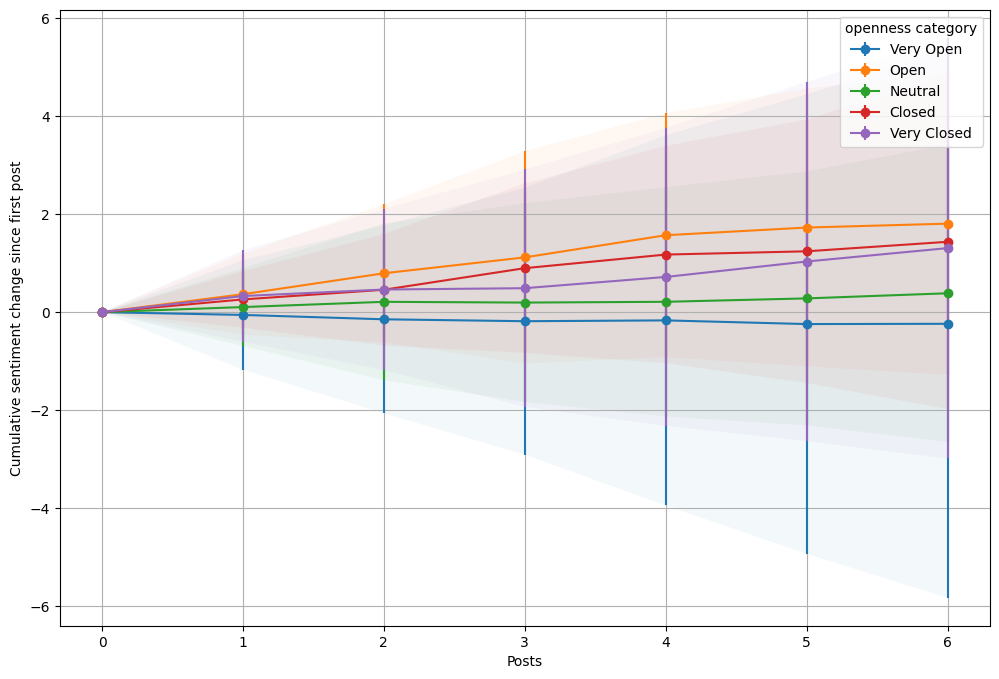

In [53]:
# and also the cumulative for this one
open0 = []
pos0 = []
pos1 = []
pos2 = []
pos3 = []
pos4 = []
pos5 = []
pos6 = []
open_tot_change = []
pos_tot_change = []
for author in author_set:
  d = df[df['author'] == author].values
  pos0.append(0)
  open0.append(d[0][9])
  pos1.append(d[1][8] - d[0][8])
  pos2.append(d[1][8]+d[2][8] - 2*d[0][8])
  pos3.append(d[1][8]+d[2][8]+d[3][8] - 3*d[0][8])
  pos4.append(d[1][8]+d[2][8]+d[3][8]+d[4][8]- 4*d[0][8])
  pos5.append(d[1][8]+d[2][8]+d[3][8]+d[4][8]+d[5][8] - 5*d[0][8])
  pos6.append(d[1][8]+d[2][8]+d[3][8]+d[4][8]+d[5][8]+d[6][8] - 6*d[0][8])
  open_tot_change.append(np.sum([d for d in df[df['author']==author]['open_change']]))
  pos_tot_change.append(np.sum([d for d in df[df['author']==author]['pos_change']]))
mined2 = pd.DataFrame()
mined2['pos0'] = pos0
mined2['posdelta'] = pos_tot_change
mined2['open0'] = open0
mined2['pos1'] = pos1
mined2['pos2'] = pos2
mined2['pos3'] = pos3
mined2['pos4'] = pos4
mined2['pos5'] = pos5
mined2['pos6'] = pos6
mined2['opendelta'] = open_tot_change
mined2.head(), mined2.shape

veryopen = []
open = []
neutral = []
closed = []
veryclosed = []

for i in mined2.values:
  if i[9] > 1:
    veryopen.append(1)
    open.append(0)
    neutral.append(0)
    closed.append(0)
    veryclosed.append(0)
  elif i[9] > .3:
    veryopen.append(0)
    open.append(1)
    neutral.append(0)
    closed.append(0)
    veryclosed.append(0)
  elif i[9] > -.3:
    veryopen.append(0)
    open.append(0)
    neutral.append(1)
    closed.append(0)
    veryclosed.append(0)
  elif i[9] > -1:
    veryopen.append(0)
    open.append(0)
    neutral.append(0)
    closed.append(1)
    veryclosed.append(0)
  else:
    veryopen.append(0)
    open.append(0)
    neutral.append(0)
    closed.append(0)
    veryclosed.append(1)

mined2['vopen'] = veryopen
mined2['open'] = open
mined2['neutral'] = neutral
mined2['closed'] = closed
mined2['vclosed'] = veryclosed
mined2.head()

vopen = mined2[mined2['vopen'] == 1]
vopen = vopen.drop(['open0', 'posdelta', 'opendelta', 'vopen', 'open', 'neutral', 'closed', 'vclosed'], axis=1)
vopen_avg = [np.mean(vopen[i].values) for i in vopen]
vopen_std = [np.std(vopen[i].values) for i in vopen]

open = mined2[mined2['open'] == 1]
open = open.drop(['open0', 'posdelta', 'opendelta', 'vopen', 'open', 'neutral', 'closed', 'vclosed'], axis=1)
open_avg = [np.mean(open[i].values) for i in open]
open_std = [np.std(open[i].values) for i in open]

neutral = mined2[mined2['neutral'] == 1]
neutral = neutral.drop(['open0', 'posdelta', 'opendelta', 'vopen', 'open', 'neutral', 'closed', 'vclosed'], axis=1)
neutral_avg = [np.mean(neutral[i].values) for i in neutral]
neutral_std = [np.std(neutral[i].values) for i in neutral]

vclosed = mined2[mined2['vclosed'] == 1]
vclosed = vclosed.drop(['open0', 'posdelta', 'opendelta', 'vopen', 'open', 'neutral', 'closed', 'vclosed'], axis=1)
vclosed_avg = [np.mean(vclosed[i].values) for i in vclosed]
vclosed_std = [np.std(vclosed[i].values) for i in vclosed]

closed = mined2[mined2['closed'] == 1]
closed = closed.drop(['open0', 'posdelta', 'opendelta', 'vopen', 'open', 'neutral', 'closed', 'vclosed'], axis=1)
closed_avg = [np.mean(closed[i].values) for i in closed]
closed_std = [np.std(closed[i].values) for i in closed]


print(vopen.shape, open.shape, neutral.shape, closed.shape, vclosed.shape)

import matplotlib.pyplot as plt
import numpy as np

time_points = [0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(12, 8))

# line plots with error bars
plt.errorbar(time_points, vopen_avg, yerr=vopen_std, label='Very Open', marker='o', linestyle='-')
plt.errorbar(time_points, open_avg, yerr=open_std, label='Open', marker='o', linestyle='-')
plt.errorbar(time_points, neutral_avg, yerr=neutral_std, label='Neutral', marker='o', linestyle='-')
plt.errorbar(time_points, closed_avg, yerr=closed_std, label='Closed', marker='o', linestyle='-')
plt.errorbar(time_points, vclosed_avg, yerr=vclosed_std, label='Very Closed', marker='o', linestyle='-')

# area charts
plt.fill_between(time_points, np.array(vopen_avg) - np.array(vopen_std),
                 np.array(vopen_avg) + np.array(vopen_std), alpha=0.05)
plt.fill_between(time_points, np.array(open_avg) - np.array(open_std),
                 np.array(open_avg) + np.array(open_std), alpha=0.05)
plt.fill_between(time_points, np.array(neutral_avg) - np.array(neutral_std),
                 np.array(neutral_avg) + np.array(neutral_std), alpha=0.05)
plt.fill_between(time_points, np.array(closed_avg) - np.array(closed_std),
                 np.array(closed_avg) + np.array(closed_std), alpha=0.05)
plt.fill_between(time_points, np.array(vclosed_avg) - np.array(vclosed_std),
                 np.array(vclosed_avg) + np.array(vclosed_std), alpha=0.05)

plt.xlabel('Posts')
plt.ylabel('Cumulative sentiment change since first post')
plt.legend(title = 'openness category')
plt.grid(True)
plt.show()
